In [56]:
!pip install mediapipe

In [58]:
import mediapipe as mp
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

In [59]:
file = '/content/arm.png'  #이미지 가져오기

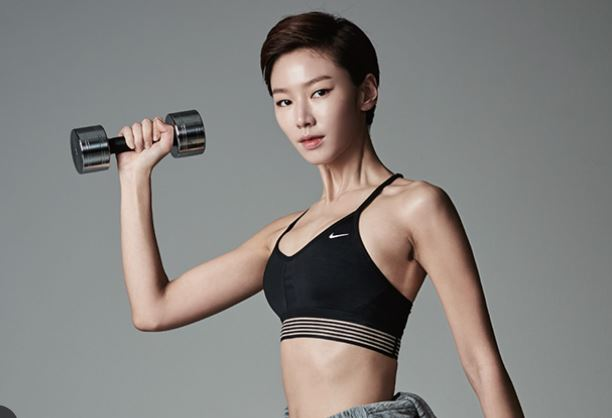

In [60]:
img = cv2.imread(file)
cv2_imshow(img)
img.shape
img_angle = np.copy(img)

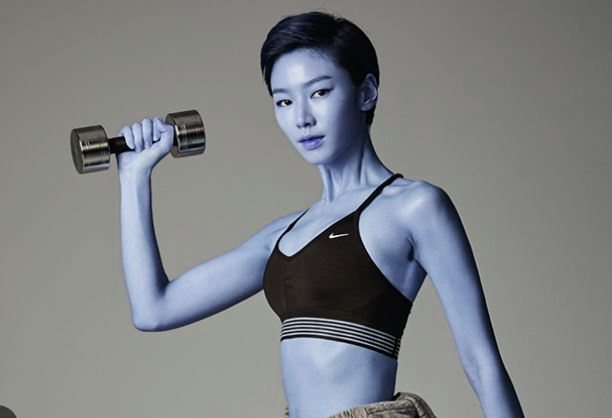

In [61]:
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   #CV는 BGR로 되어있는데(대부분 하드웨어상태가 이렇게 되어있어서), 이것을 쓰려면 그레이나, RGB
cv2_imshow(img_RGB) #RGB형식을 지원하기때문에

In [62]:
mp_pose = mp.solutions.pose   #미디어파이프 내에 있는 솔루션에서 여러가지 부위중 포즈항목을 선택한것임
mp_drawing = mp.solutions.drawing_utils #선과 포인트잡는 기능 가져오는 것

In [63]:
mp = mp_pose.Pose(static_image_mode = True, min_detection_confidence= 0.5, min_tracking_confidence=0.5) #분석할때 정확도가 50%이상될때 버여라

In [64]:
results = mp.process(img_gray) #잘보이게 빨리찾으라고 색깔을

In [79]:
print(len(results.pose_landmarks.landmark)) #포즈를 찾는 랜드마크안에서 마크를 찍어서 보여줘(몇개야?_)
print(type(results.pose_landmarks.landmark[0])) #타입보기 정확한 리스트는 아니지만, 리스트처럼 쓸수있다.

33
<class 'mediapipe.framework.formats.landmark_pb2.NormalizedLandmark'>


In [66]:
for lndmark in results.pose_landmarks.landmark: #for문으로 33개의 포인트를 돌려서 좌표를 갖고있는 것을 보자
  print(lndmark)

x: 0.478385865688324
y: 0.27434206008911133
z: -0.3975726366043091
visibility: 0.9999908208847046

x: 0.4937022030353546
y: 0.22457921504974365
z: -0.40983763337135315
visibility: 0.9999809265136719

x: 0.5099146962165833
y: 0.22072535753250122
z: -0.4097854197025299
visibility: 0.9999790191650391

x: 0.5276855826377869
y: 0.21596813201904297
z: -0.4098384380340576
visibility: 0.9999845027923584

x: 0.469320148229599
y: 0.23028433322906494
z: -0.3264220952987671
visibility: 0.9999815225601196

x: 0.4642602801322937
y: 0.2314450740814209
z: -0.3259925842285156
visibility: 0.9999750852584839

x: 0.4586467444896698
y: 0.23302435874938965
z: -0.3262110948562622
visibility: 0.9999822378158569

x: 0.5669710636138916
y: 0.22410255670547485
z: -0.36378294229507446
visibility: 0.999985933303833

x: 0.4781225919723511
y: 0.25315821170806885
z: 0.028181979432702065
visibility: 0.999975323677063

x: 0.5166298151016235
y: 0.3286859393119812
z: -0.3824525475502014
visibility: 0.9999912977218628

x: 

In [67]:
landmarks = results.pose_landmarks #결과 변수 재정의, 간단하게 표기하기 위해서

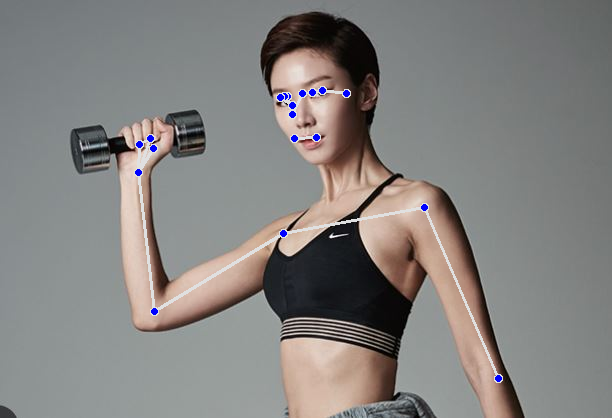

In [68]:
mp_drawing.draw_landmarks(img, landmarks, mp_pose.POSE_CONNECTIONS,
                          mp_drawing.DrawingSpec((255,0,0), 2, 2))   #포인트를 표시
cv2_imshow(img)

In [69]:
shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER] #
print(shoulder.x, shoulder.y)
shoulder_x = int(img.shape[1] * shoulder.x)#x는 numpy이므로,row  곱하는 이유, 0~1값이므로 전체비율로 확대해서 보기위해
shoulder_y = int(img.shape[0] * shoulder.x)#Y는 컬럼
shoulder_pos = [shoulder_x, shoulder_y]  #데이터 타입을 보기위해
print(shoulder_pos)


0.46379297971725464 0.558758556842804
[283, 193]


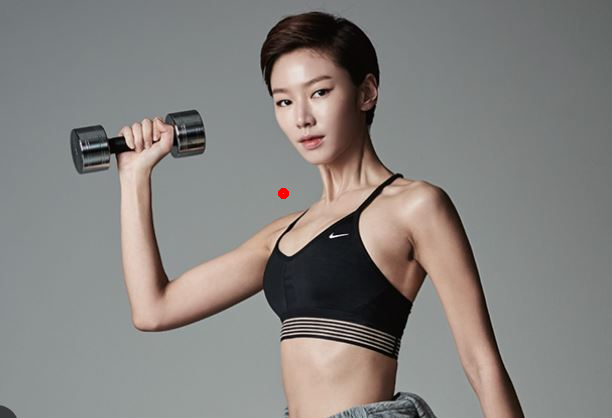

In [70]:
cv2.circle(img_angle, (shoulder_x, shoulder_y), 3, (0,0,255), 3) #어깨 찾아서 점을 찍었음 (다시 보이기 위해서 다시 BGR로 바꿨음)
cv2_imshow(img_angle)

In [ ]:
wrist = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_WRIST]  # 니네가 찾아 손목부터
wrist_x = int(img.shape[1] * wrist.x)
wrist_y = int(img.shape[0] * wrist.y)
cv2.circle(img_angle, (wrist_x, wrist_y), 3, (0,0,255), 3, -1)

elbow = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ELBOW] #팔꿈치
elbow_x = int(img.shape[1] * elbow.x)
elbow_y = int(img.shape[0] * elbow.y)
cv2.circle(img_angle, (elbow_x, elbow_y), 3, (0,0,255), 3, -1)

cv2_imshow(img_angle)

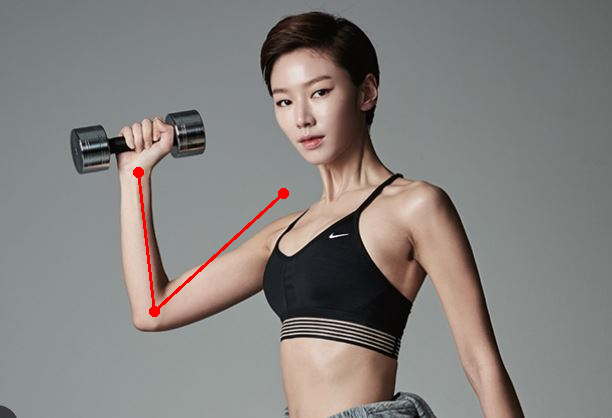

In [72]:
cv2.line(img_angle, (wrist_x, wrist_y), (elbow_x, elbow_y), (0,0,255), 2)
cv2.line(img_angle, (shoulder_x, shoulder_y), (elbow_x, elbow_y), (0,0,255), 2) #선그리기
cv2_imshow(img_angle)

In [81]:
def calculate_angle(a,b,c):  #가져다 써
    a = np.array(a) # First
    b = np.array(b) # Mid
    c = np.array(c) # End

    radians = np.arctan2(c[1]-b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
    angle = np.abs(radians*180.0/np.pi)   #각도잡는 공식 넘파이에서는 아크탄젠즈로 들어간다

    if angle >180.0:
        angle = 360-angle

    return angle

In [82]:
shoulder_pos = [shoulder_x, shoulder_y] #아래 파라미터에 포지션값을 넘기기 위해서 간단하게 변수처리
elbow_pos = [ elbow_x,  elbow_y]
wrist_pos = [wrist_x, wrist_y]

54


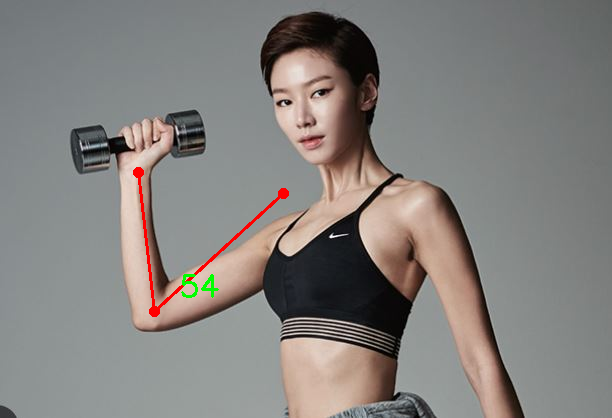

In [76]:
angle = int(calculate_angle(shoulder_pos, elbow_pos,wrist_pos )) #위 파라미터 대입
print( angle)
cv2.putText(img_angle, str(angle), (elbow_x+25, elbow_y-15),  cv2.FONT_HERSHEY_SIMPLEX, 1,  (0, 255, 0),  2) #각도 표시

cv2_imshow(img_angle)